# Extension of stream_particles_model_data

In [1]:
from galpy.orbit import Orbit
from galpy import potential
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
from IPython.display import HTML
from galpy.potential import MWPotential2014,ChandrasekharDynamicalFrictionForce,HernquistPotential,MovingObjectPotential
from galpy.util import conversion
from streamtools.df import streamspraydf

from stream_package.stream_package import graphics

/home/student04/.local/lib/python3.10/site-packages/galpy/util/bovy_conversion.py:6: FutureWarning: galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9',FutureWarning)

/home/student04/.local/lib/python3.10/site-packages/galpy/util/bovy_coords.py:6: FutureWarning: galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old impo

In [2]:
pot = MWPotential2014
tdisrupt=5
mass = 1e7

ro = 8.
vo = 220.
to = conversion.time_in_Gyr(ro=ro, vo=vo)
mo = conversion.mass_in_msol(ro=ro, vo=vo)

sixD_pace = [209.3, 26.8, 46.5, -1.176, -0.89, 197.5]
o = Orbit(vxvv = sixD_pace, ro=ro, vo=vo, solarmotion = [-11.1, 24.0, 7.25], radec=True)
o.turn_physical_off()

In [3]:
sixD_kevin_means = [209.3, 26.8, 46.5, -1.16, -0.88, 189.8]
o_k = Orbit(vxvv = sixD_kevin_means, ro=ro, vo=vo, solarmotion = [-11.1, 24.0, 7.25], radec=True)
o_k.turn_physical_off()

pot = MWPotential2014
tdisrupt = 5
mass = 1e7

In [4]:
MWpotLMC = graphics.lmc_potential_wacc(tdisrupt, pot=MWPotential2014)

ok_intb = Orbit(vxvv = sixD_kevin_means, ro=ro, vo=vo, solarmotion = [-11.1, 24.0, 7.25], radec=True)
tsb = np.linspace(0, -1/to, 201)
ok_intb.integrate(tsb, pot=MWpotLMC)
ok_intf = Orbit(vxvv = sixD_kevin_means, ro=ro, vo=vo, solarmotion = [-11.1, 24.0, 7.25], radec=True)
tsf = np.linspace(0, 1/to, 201)
ok_intf.integrate(tsf, pot=MWpotLMC)

In [5]:
import pickle
filehandler = open('lmc_stream_models_k.obj', 'rb') 
obj = pickle.load(filehandler)

oallk_lmc = obj.get("K: MW14 1E7")
oallk_lmc2 = obj.get("K: MW14 5E7")
oallk_lmc3 = obj.get("K: MW14 1E6")

In [6]:
import numpy as np
import pandas as pd

data = pd.read_csv(r"boo3_combined.csv",sep='\s+')

In [7]:
data['s5_rrl'].to_list()[23:26]
data['gaia'].to_list()[26:]

dist_kpc = data['distance_pc'].to_list()[23:]
dist_kpc = [x/1000 for x in dist_kpc]
ra_deg = data['ra'].to_list()[23:]
dec_deg = data['dec'].to_list()[23:]

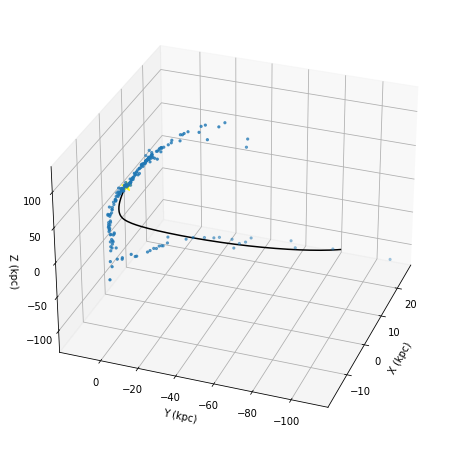

In [29]:
# 3D projection in x,y,z
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(oallk_lmc.x(), oallk_lmc.y(), oallk_lmc.z(), marker='.')
ax.scatter(o_k.x()*ro, o_k.y()*ro, o_k.z()*ro, marker='*', c='yellow', s = 100)

# plotting the orbit of Boo3 over past 5yrs
ax.plot(ok_intb.x(tsb), ok_intb.y(tsb), ok_intb.z(tsb), c = 'k')

# Including MW
#ax.scatter(0,0,0, marker = '*', c='g', s=100)

ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
ax.set_zlabel('Z (kpc)')

ax.view_init(30,200)
plt.show()

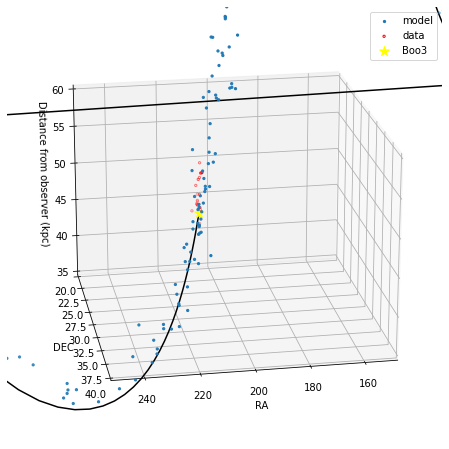

In [28]:
# 3D projection in ra, dec
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(oallk_lmc.ra(), oallk_lmc.dec(), oallk_lmc.dist(), marker='.', label='model')
ax.scatter(ra_deg, dec_deg, dist_kpc, marker='.',facecolors='none', edgecolors='red', label='data')

ax.scatter(o_k.ra(), o_k.dec(), o_k.dist(), marker='*', c='yellow', s = 100, label='Boo3')

ax.plot(ok_intb.ra(tsb), ok_intb.dec(tsb), ok_intb.dist(tsb), c='k')

ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.set_zlabel('Distance from observer (kpc)')

ax.set_xlim(150,250)
ax.set_ylim(20,40)
ax.set_zlim(35,60)

ax.view_init(20,80)
ax.legend()
plt.show()